# Photonics Project: Exceptional precision of a nonlinear optical sensor at square root singularity

Done by Rishank, Rhishabh, Shadab, Shivam and Uppala Mukesh $\newline$
Reference: https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.129.013901

## ABSTRACT

Exceptional point sensors have attracted recent attention since they perform better than linear sensors. However the noise amplified causes decrease precision of the sensor.
The above paper proposes a single-mode Kerr nonlinear resonator for improved sensing in noisy environment at a square root singularity similar to an exceptional point the extrema of the hystersis curve. Based on the dynamic hystersis curve, the signal (defined as the difference between 2 extrema) displays a square root singularity similar to EP sensors but with crucial fundamental and practical advantages compared to EP sensors.

## INTRODUCTION TO EP SENSORS

Sensing at exceptional point has attracted interest after a recent paper by Wiersig in 2014. An exceptional point occurs when a pair of eigenvalues and eigenvectors simultaneously coalesce for a non-hermitian hamiltonian.The model generally uses two coupled linear resonators and provides better sensing at of the order of $\sqrt{\epsilon}$ compared to  $\epsilon$ for conventional sensors. For example, consider a hamiltonian with complex frequencies $\tilde\omega_1$ and $\tilde\omega_2$ of the form:
\begin{pmatrix}
\omega_1 & g \\
g & \omega_2 \\
\end{pmatrix}
For this hamiltonian the eigenvalues are:
$\omega_{\pm}=\tilde \omega_{av}\pm\tilde\Delta/2\sqrt{1+(\frac{2g}{\tilde\Delta})^2}$
where $w_{av}=(\tilde\omega_1+\tilde\omega_2)/2$ and $\tilde\Delta=\tilde\omega_1-\tilde\omega_2$
Notice that the eigenvalues coalesce for $\frac{2g}{\tilde\Delta}=i$ so this is called the exceptional point. Notice that at the exceptional point a pertubation of the form $R[\tilde\omega_j]\rightarrow R[\tilde\omega_j]+\epsilon$ results in a splitting $R[\omega_+-\omega_-]\propto \sqrt{\epsilon}$. Hence for small $\epsilon$ the sensor offers better sensitivity. However it has been argued that the precision of these types of sensors are affected by noise since this is also enhanced. Hence sensitivity alone is not enough to differentiate between a good and a bad sensor. In this paper, we demonstrate optical sensing beyond the constraints of linear sensors using a single coherently driven Kerr non-linear oscillator by measuring the splitting in transmitted intensities at the endpoints of a hystersis cycle. We will also show that the transmitted intensities scales with square root of the the perturbation strength. This sensor can be realised using the Fabry-Perot cavity architectures where one mode is spectrally distant from all other modes and probes an intensity dependent refractive index. 

## A NON-LINEAR OPTICAL SENSOR

From the above discussion it is clear that sensitivity alone is not enough to differentiate between a good and a bad sensor. In this paper, we demonstrate optical sensing beyond the constraints of linear sensors using a single coherently driven Kerr non-linear oscillator by measuring the splitting in transmitted intensities at the endpoints of a hystersis cycle. We will also show that the transmitted intensities scales with square root of the the perturbation strength. This sensor can be realised using the Fabry-Perot cavity architectures where one mode is spectrally distant from all other modes and probes an intensity dependent refractive index. 

For a frame rotating at the driving frequency $\omega$, the intracavity field $\alpha$ satisfies the following equation: $\newline$
$i\dot\alpha (t)={-\Delta-\frac{i\Gamma}{2}+U(|\alpha(t)|^2-1)}\alpha (t)+i\sqrt(\kappa_L)F+D\xi(t)$

Here, $\Gamma=\gamma+\kappa_L+\kappa_R$, U is the kerr non-linearity strength and $\Delta=\omega-\omega_0$ is the laser detuning from resonance frequency $\omega_0$

Let us try to plot the intracavity photon number N=$|\alpha|^2$ using the equation
$i\dot\alpha (t)={-\Delta-\frac{i\Gamma}{2}+U(|\alpha(t)|^2-1)}\alpha (t)+i\sqrt(\kappa_L)F+D\xi(t)$ and setting D=0 along with the initial conditions N(0)=0 and parameter values given below

Substituting $\alpha=a+ib$ where a and b are real numbers and equating the real and imaginary parts of the equation yields the following coupled non-linear differential equations $\newline$
$\dot a=(-\Delta+U(a^2+b^2-1))b-\frac{a\Gamma}{2}+\sqrt{\kappa_L}F\newline$
$\dot b=\frac{-b\Gamma}{2}-a(-\Delta+U(a^2+b^2-1))$

In the code below we attempt to numerically solve for a and b using solve_ivp() to plot the intracavity photon number N=$|\alpha (t)|^2=a^2+b^2$ as a function of $F/\sqrt{\Gamma}$ wherein we are scanning $F/\sqrt{\Gamma}$ linearly forwards and backwards within a time $T=10^4/\Gamma$. For the present graphs, we assume $\Gamma=1$, $\kappa_L=0.5$, $U=1/100$

In [1]:
#importing essential libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')

In [2]:
# x->F/gamma
def func(t,x):
    return [500*((-1+0.01*(x[0]**2+x[1]**2-1))*x[1]-x[0]*0.5+math.sqrt(0.5)*(t)),500*(-x[1]*0.5-x[0]*(-1+0.01*(x[0]**2+x[1]**2-1)))]

In [3]:
t_eval=np.arange(0,10,0.01)
res=solve_ivp(func,[0,10],[0,0],t_eval=t_eval)
#res

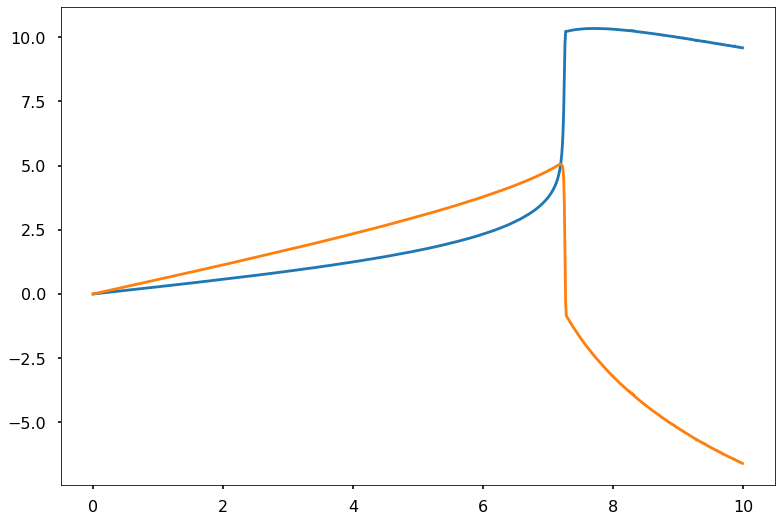

In [4]:
plt.plot(res.t,res.y.T)
#variation of a and b wrt time

In [5]:
res.y.T

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 3.50975435e-03,  4.81203529e-03],
       [ 6.24817442e-03,  1.03598705e-02],
       ...,
       [ 9.59314976e+00, -6.57319055e+00],
       [ 9.58836142e+00, -6.58909806e+00],
       [ 9.58706290e+00, -6.59601024e+00]])

In [6]:
ans=[x[0]**2+x[1]**2 for x in res.y.T] #forward plot
res.y.T[-1]

array([ 9.5870629 , -6.59601024])

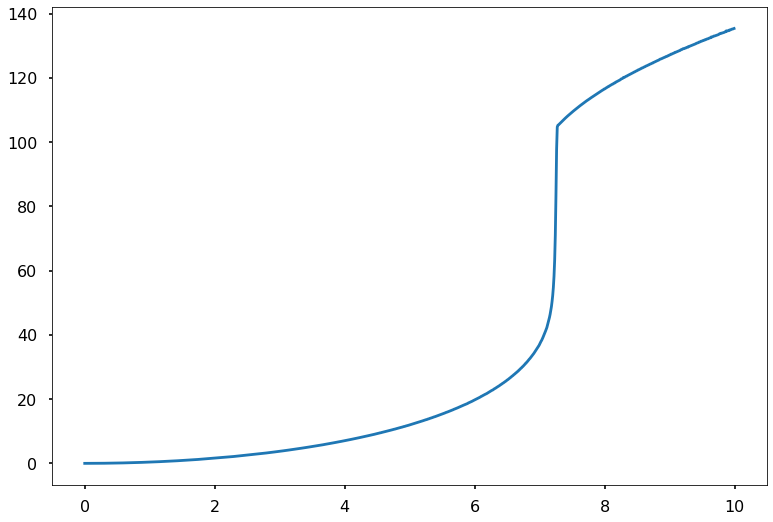

In [7]:
plt.plot(res.t,ans)

If we do linear scan of F as we vary t from 0 to T then we have:
$t=\frac{TF}{20\sqrt{\Gamma}}$ for the forward scan and for the backward scan, $t=\frac{-TF}{20\sqrt{\Gamma}}+T$


In [8]:
def func_2(t,x):
    return [-500*((-1+0.01*(x[0]**2+x[1]**2-1))*x[1]-x[0]*0.5+math.sqrt(0.5)*(t)),-500*(-x[1]*0.5-x[0]*(-1+0.01*(x[0]**2+x[1]**2-1)))]
t=np.arange(10,0,0.01)
t_sp0=res.y.T[-1][0]
t_sp1=res.y.T[-1][1]
res1=solve_ivp(func_2,[10,0],[t_sp0,t_sp1])
res1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 10706
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([1.00000000e+01, 9.99435508e+00, 9.98918392e+00, ...,
       6.44780426e-03, 1.11045739e-03, 0.00000000e+00])
 t_events: None
        y: array([[ 9.58706290e+00,  9.57851728e+00,  9.58273235e+00, ...,
         1.11863099e-03, -3.65532464e-04, -6.75017409e-04],
       [-6.59601024e+00, -6.60499534e+00, -6.60122589e+00, ...,
         4.51294154e-03,  1.51034531e-03,  8.85952372e-04]])
 y_events: None

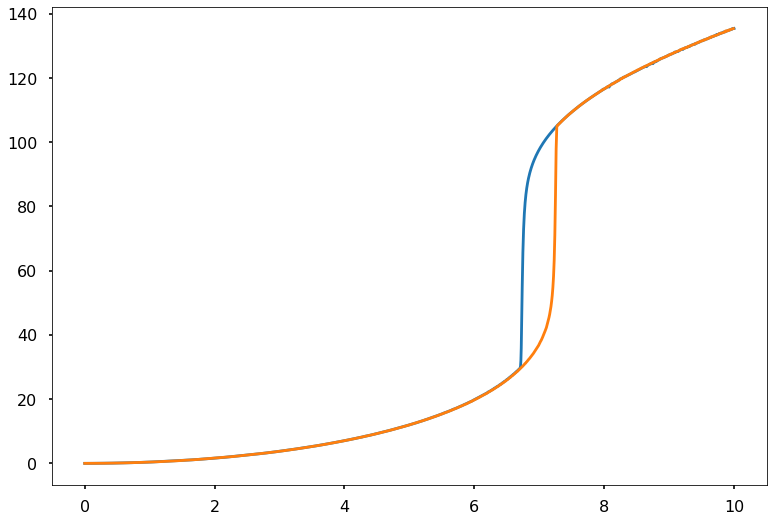

In [9]:
ans1=[x[0]**2+x[1]**2 for x in res1.y.T] #forward plot
plt.plot(res1.t,ans1)
plt.plot(res.t,ans)

The above graph demonstrates the dynamic hystersis. However by setting $\dot\alpha$=0 in the equation $i\dot\alpha (t)={-\Delta-\frac{i\Gamma}{2}+U(|\alpha(t)|^2-1)}\alpha (t)+i\sqrt(\kappa_L)F+D\xi(t)$ we obtain the steady state solutions as 
$\newline$
$\tilde N_{\pm}=\frac{2\Delta}{3U}\pm\frac{2\Delta}{6U}\sqrt{1-(\frac{\sqrt{3}\Gamma}{2\Delta})^2}$
$\newline$
This is resembles the equation for the EP sensor using non-hermitian hamiltonian earlier in the paper.

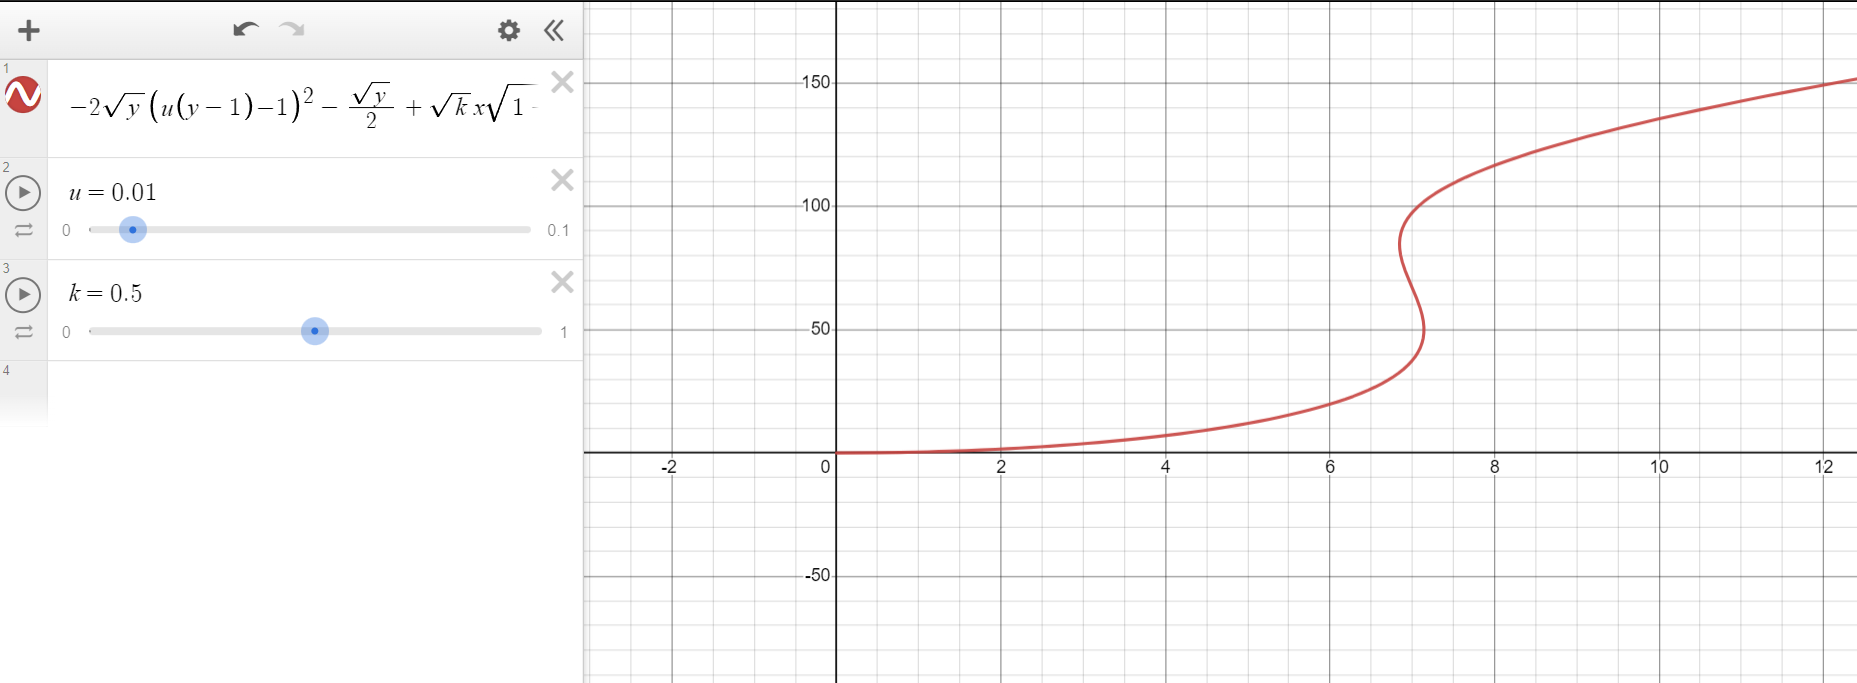
https://www.desmos.com/calculator/zhxszbbxrs
$\newline$
The above image/calculator demonstrates the variations of steady state solutions with $F/\sqrt{\Gamma}$. However this is valid for slow protocols only. For fast protocols there are no sharp turns in N making $\tilde N$ ill-defined.


In the above plot, the extrema points from which the curves branch out and meet each other again are called $N_-$ and $N_+$ respectively.
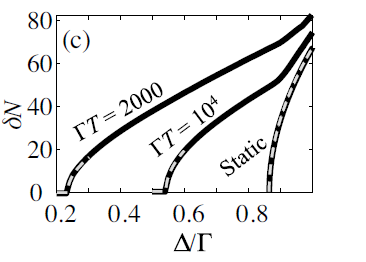
In the dynamic case, the difference between $N_+$ and $N_-$ is used as the signal for sensing. Figure (c) shows how δN scales with Δ=Γ for two
nonadiabatic protocols, one with period T=2000/Γ and
another with T=$10^4$/Γ. The static δN, corresponding to
T → ∞, is shown for reference. All δN are fitted (see
dashed gray curves) with square-root functions near the
singularity at ΔSS; this is the point where $N_+$ and $N_-$
coalesce. The excellent fits evidence that the desired
square-root scaling persists for detunings below the static
bistability threshold Δc and for highly nonadiabatic protocols.
Actually, our approach works for any positive
detuning, but Δ < Δc is advantageous for fast sensing
because ΔSS decreases with speed as Fig. (c) shows.

## EFFECTS OF NOISE AND IMPROVEMENTS

## CONCLUSION

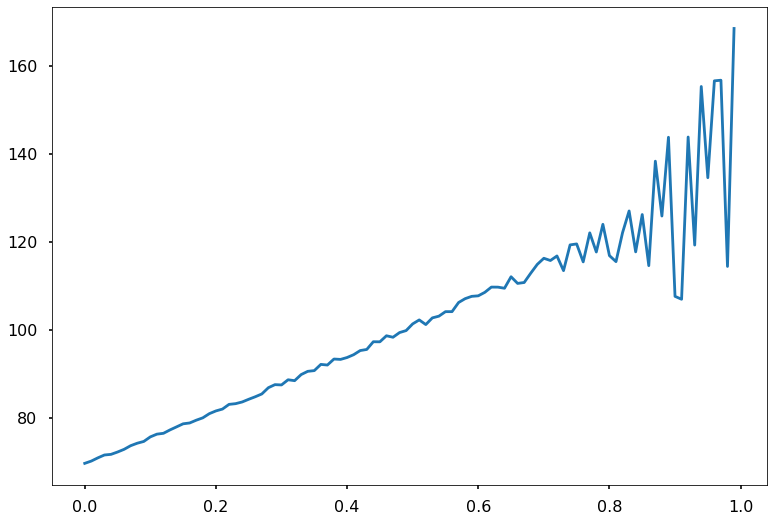

In [10]:
#code to find N+ and N-
d=np.arange(0,1,0.01)
w1=[]
w2=[]
for w in d:
    f1=lambda t,x:[200*((-w+0.01*(x[0]**2+x[1]**2-1))*x[1]-x[0]*0.5+math.sqrt(0.5)*(t)),500*(-x[1]*0.5-x[0]*(-w+0.01*(x[0]**2+x[1]**2-1)))]    
    res1=solve_ivp(f1,[0,10],[0,0])
    ans1=[x[0]**2+x[1]**2 for x in res1.y.T] 
    f2=lambda t,x:[-200*((-w+0.01*(x[0]**2+x[1]**2-1))*x[1]-x[0]*0.5+math.sqrt(0.5)*(t)),-500*(-x[1]*0.5-x[0]*(-w+0.01*(x[0]**2+x[1]**2-1)))]
    res2=solve_ivp(f2,[10,0],[res1.y.T[-1][0],res1.y.T[-1][1]])
    ans2=[x[0]**2+x[1]**2 for x in res2.y.T]
    flag=0
    n1=0
    n2=0
    for i in range(min(len(ans2),len(ans1))):
        if(ans1[i]!=ans2[i] and flag==0):
            n1=ans1[i-1]
            flag=1
        elif(ans1[i]==ans2[i]):
            n2=ans1[i]
            break;
    w2.append(n1-n2)
    w1.append(w)
plt.plot(w1,w2)    